In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from sklearn.metrics import mean_absolute_percentage_error


In [2]:
!pip install prophet
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00


In [3]:
import prophet
from matplotlib import pyplot as plt

In [4]:
data=pd.read_csv("/content/sample_data/Crude oil.csv")
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63


In [5]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2548 non-null   datetime64[ns]
 1   Close/Last  2548 non-null   float64       
 2   Volume      2517 non-null   float64       
 3   Open        2548 non-null   float64       
 4   High        2548 non-null   float64       
 5   Low         2548 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 119.6 KB


In [6]:
data=data.sort_values(by='Date')
data=data.reset_index(drop=True)
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2012-10-30,85.68,NaN,85.68,85.68,85.68
1,2012-10-31,86.24,192354.0,85.73,87.19,85.61
2,2012-11-01,87.09,185097.0,86.10,87.42,85.92
3,2012-11-02,84.86,273619.0,86.91,87.24,84.66
4,2012-11-05,85.65,185846.0,84.65,85.90,84.34


In [7]:
data=data.rename(columns={"Close/Last":"price"})
data.head()

,Date,price,Volume,Open,High,Low
0,2012-10-30,85.68,NaN,85.68,85.68,85.68
1,2012-10-31,86.24,192354.0,85.73,87.19,85.61
2,2012-11-01,87.09,185097.0,86.10,87.42,85.92
3,2012-11-02,84.86,273619.0,86.91,87.24,84.66
4,2012-11-05,85.65,185846.0,84.65,85.90,84.34


In [8]:
data=data.iloc[:,[0,3,1,2,4,5]]
data.head()

,Date,Open,price,Volume,High,Low
0,2012-10-30,85.68,85.68,NaN,85.68,85.68
1,2012-10-31,85.73,86.24,192354.0,87.19,85.61
2,2012-11-01,86.10,87.09,185097.0,87.42,85.92
3,2012-11-02,86.91,84.86,273619.0,87.24,84.66
4,2012-11-05,84.65,85.65,185846.0,85.90,84.34


In [9]:
def MAPE(pred,org):
  return np.mean((np.abs(pred-org)/org)*100)

In [10]:
data=data.interpolate(method='bfill')

In [11]:
data.isnull().sum()

Date      0
Open      0
price     0
Volume    0
High      0
Low       0
dtype: int64

In [12]:
data=data.rename({'Date':'ds','Open':'y'},axis=1)
data.head()

,ds,y,price,Volume,High,Low
0,2012-10-30,85.68,85.68,192354.0,85.68,85.68
1,2012-10-31,85.73,86.24,192354.0,87.19,85.61
2,2012-11-01,86.10,87.09,185097.0,87.42,85.92
3,2012-11-02,86.91,84.86,273619.0,87.24,84.66
4,2012-11-05,84.65,85.65,185846.0,85.90,84.34


In [13]:
data.shape

(2548, 6)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

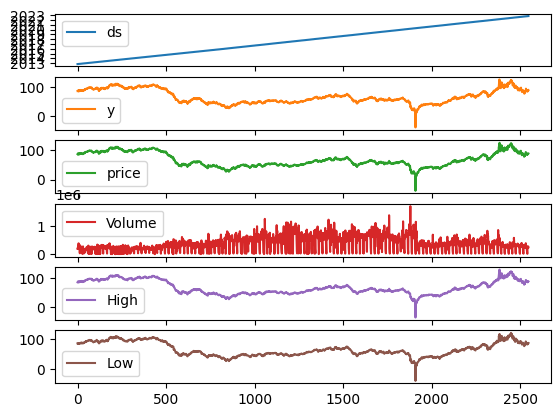

In [14]:
data.plot(subplots=True)

In [15]:
train=data.iloc[:2001]
test=data.iloc[2001:]

In [16]:
from prophet import Prophet

model=Prophet(interval_width=0.9)
model.add_regressor('price',standardize=False)
model.add_regressor('Volume',standardize=False)
model.add_regressor('High',standardize=False)
model.add_regressor('Low',standardize=False)
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5lzdf2jh/i9bh3wbm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5lzdf2jh/1u72br3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9793', 'data', 'file=/tmp/tmp5lzdf2jh/i9bh3wbm.json', 'init=/tmp/tmp5lzdf2jh/1u72br3b.json', 'output', 'file=/tmp/tmp5lzdf2jh/prophet_modelqy812k7s/prophet_model-20231017041851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:18:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
04:18:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during p

In [17]:
model.params

OrderedDict([('lp__', array([[9838.41]])),
             ('k', array([[0.0378546]])),
             ('m', array([[-0.0605104]])),
             ('delta',
              array([[-2.14756e-02, -3.21706e-02,  1.94395e-09,  2.80061e-03,
                       9.63962e-07,  2.32259e-02, -1.99477e-09, -1.07207e-02,
                      -1.86274e-09, -9.83862e-10, -4.10034e-03,  4.48482e-06,
                       3.92432e-03,  3.38904e-05, -2.60391e-04, -2.65093e-09,
                       4.02555e-09,  2.52715e-09,  9.16576e-03,  7.91126e-10,
                      -1.69590e-02, -4.30632e-05,  6.16487e-03,  5.07996e-03,
                      -1.75280e-09]])),
             ('sigma_obs', array([[0.00443508]])),
             ('beta',
              array([[-2.46481e-04, -3.66121e-04,  4.45120e-06, -1.84001e-04,
                       8.33704e-05, -1.47742e-04, -1.84439e-04, -9.60940e-05,
                      -1.42028e-05,  3.11537e-04, -2.86698e-05,  1.88527e-04,
                      -3.38034e-05

In [18]:
test.head()

,ds,y,price,Volume,High,Low
2001,2020-08-28,42.98,42.97,255609.0,43.42,42.69
2002,2020-08-31,42.91,42.61,219480.0,43.57,42.56
2003,2020-09-01,42.83,42.76,269697.0,43.43,42.72
2004,2020-09-02,43.02,41.51,396996.0,43.21,41.23
2005,2020-09-03,41.63,41.37,393678.0,41.79,40.22


In [19]:
test_two=test.iloc[:,[0,2,3,4,5]]
test_two.head()

,ds,price,Volume,High,Low
2001,2020-08-28,42.97,255609.0,43.42,42.69
2002,2020-08-31,42.61,219480.0,43.57,42.56
2003,2020-09-01,42.76,269697.0,43.43,42.72
2004,2020-09-02,41.51,396996.0,43.21,41.23
2005,2020-09-03,41.37,393678.0,41.79,40.22


In [20]:
forecast1=model.predict(test_two)
forecast1=forecast1[['ds','yhat']]
forecast1

,ds,yhat
0,2020-08-28,43.231140
1,2020-08-31,43.498150
2,2020-09-01,43.324914
3,2020-09-02,42.765807
4,2020-09-03,40.893320
...,...,...
542,2022-10-24,84.356024
543,2022-10-25,84.220269
544,2022-10-26,85.442371
545,2022-10-27,88.945677


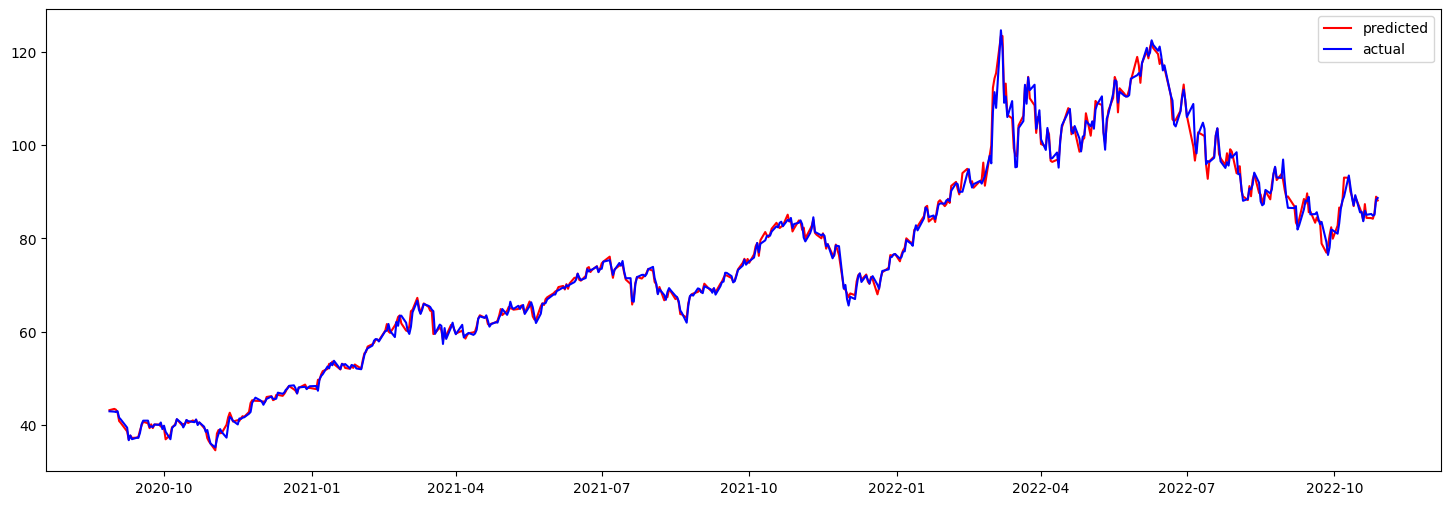

In [21]:
plt.figure(figsize=(18,6))
plt.plot(forecast1['ds'],forecast1['yhat'],color='red',label='predicted')
plt.plot(test['ds'],test['y'],color='blue',label='actual')
plt.legend()

In [22]:
MAPE(test['y'].values,forecast1['yhat'].values)

1.05907338972626

In [23]:
temp=test.iloc[0:1,[0,2,3,4,5]]
temp.head()


,ds,price,Volume,High,Low
2001,2020-08-28,42.97,255609.0,43.42,42.69


In [24]:
fc=model.predict(temp)
fc=fc[['ds','yhat','yhat_lower','yhat_upper']]
fc

,ds,yhat,yhat_lower,yhat_upper
0,2020-08-28,43.23114,42.39852,44.097699


In [25]:
di={'ds':['2020-08-28'],'price':[23]	,'Volume':[20000],'High':[45],	'Low':[34]}

In [26]:
df=pd.DataFrame(di)
df

,ds,price,Volume,High,Low
0,2020-08-28,23,20000,45,34


In [27]:
df['ds']=pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1 non-null      datetime64[ns]
 1   price   1 non-null      int64         
 2   Volume  1 non-null      int64         
 3   High    1 non-null      int64         
 4   Low     1 non-null      int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 168.0 bytes


In [28]:
fc=model.predict(df)
fc=fc[['ds','yhat','yhat_lower','yhat_upper']]
fc

,ds,yhat,yhat_lower,yhat_upper
0,2020-08-28,50.11905,49.341734,50.926952


In [43]:
fc.yhat[0]

50.1190497098945

In [34]:
import pickle

In [35]:
#model.logger=None
model.stan_backend.logger = None
#m.stan_backend.logger = None

In [36]:

pickle_out=open("prophet_model.pkl",mode="wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [37]:
# Python
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(model))  # Save model

#with open('serialized_model.json', 'r') as fin:
#    m = model_from_json(fin.read())  # Load model
